In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TrainOnMe-6.csv')

In [3]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Dragspel,1.42038,735.17784,1001.01801,-141.68616,0.00000,Slussen,0.95499,-1.69662,5473.72196,-89187.80109,True,False,-2.84076
1,Serpent,-0.30564,-1172.52474,1000.63509,30.72446,-0.00000,Brinnelvägen 8,-2.29523,-0.28491,5475.64233,-89185.65052,False,False,0.61127
2,Dragspel,1.41124,-2270.39585,1000.30931,-140.91191,-0.00000,KTH Biblioteket,0.90352,-0.55290,5475.40290,-89187.49450,False,False,-2.82248
3,Dragspel,0.40752,-1691.50839,1000.62735,-40.61188,-0.00000,Östra stationen,3.56674,-1.05227,5475.19784,-89185.42391,False,False,-0.81505
4,Serpent,-0.33494,188.67147,1000.64021,33.90150,0.00000,Slussen,1.33713,-0.85736,5474.62033,-89185.55029,False,False,0.66987


# Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1005 non-null   object 
 1   x1      1002 non-null   object 
 2   x2      1002 non-null   object 
 3   x3      1001 non-null   object 
 4   x4      1001 non-null   object 
 5   x5      1000 non-null   object 
 6   x6      771 non-null    object 
 7   x7      999 non-null    float64
 8   x8      999 non-null    float64
 9   x9      999 non-null    float64
 10  x10     999 non-null    float64
 11  x11     999 non-null    object 
 12  x12     999 non-null    object 
 13  x13     999 non-null    float64
dtypes: float64(5), object(9)
memory usage: 110.0+ KB


In [5]:
df.shape

(1005, 14)

In [6]:
df.drop_duplicates().shape

(1005, 14)

In [7]:
df.isnull().sum()

y        0
x1       3
x2       3
x3       4
x4       4
x5       5
x6     234
x7       6
x8       6
x9       6
x10      6
x11      6
x12      6
x13      6
dtype: int64

In [8]:
df_dropx6 = df.drop('x6',axis=1)

In [9]:
df_dropx6.isnull().sum()

y      0
x1     3
x2     3
x3     4
x4     4
x5     5
x7     6
x8     6
x9     6
x10    6
x11    6
x12    6
x13    6
dtype: int64

In [10]:
df_nonnull = df_dropx6.dropna()
df_nonnull.isnull().sum()

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64

In [11]:
df_nonnull.shape

(999, 13)

In [12]:
#df_nonnull.to_csv('clean_1.csv', index=False)

In [13]:
df = pd.read_csv('clean_1.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       999 non-null    object 
 1   x1      999 non-null    object 
 2   x2      999 non-null    float64
 3   x3      999 non-null    float64
 4   x4      999 non-null    float64
 5   x5      999 non-null    float64
 6   x7      999 non-null    float64
 7   x8      999 non-null    float64
 8   x9      999 non-null    float64
 9   x10     999 non-null    float64
 10  x11     999 non-null    object 
 11  x12     999 non-null    object 
 12  x13     999 non-null    float64
dtypes: float64(9), object(4)
memory usage: 101.6+ KB


After removing the rows containing the NaN values, we can see that x2 - x5 are now of float64 dtype. 

In [18]:
def get_type(x):
    return type(x).__name__

In [19]:
pd.set_option('display.max_rows', None)

In [23]:
print(pd.concat([df['x1'], df['x1'].apply(get_type)], axis=1))

# Inspecting 'x1' we can see that we have one outlier on row 301 and one '?' value on row 716

                             x1   x1
0                       1.42038  str
1                      -0.30564  str
2                       1.41124  str
3                       0.40752  str
4                      -0.33494  str
5                       0.92413  str
6                       0.31004  str
7                       0.81579  str
8                      -1.73332  str
9                       0.26826  str
10                      0.51323  str
11                      0.20248  str
12                      2.20176  str
13                      1.64065  str
14                      0.99711  str
15                      0.91127  str
16                      0.88293  str
17                      0.32842  str
18                      0.49861  str
19                      0.14186  str
20                      0.36849  str
21                     -1.24547  str
22                      0.31212  str
23                      1.86401  str
24                     -0.26460  str
25                     -0.17703  str
2

# 'y'

In [22]:
df['y'].value_counts()

Dragspel       558
Nyckelharpa    231
Serpent        210
Name: y, dtype: int64

There seems to be some misspelled labels. 

In [21]:
# We fix the misspelled labels.
df['y'] = df['y'].replace('ragspel', 'Dragspel')
df['y'] = df['y'].replace('yckelharpa', 'Nyckelharpa')
df['y'] = df['y'].replace('erpent', 'Serpent')

# 'x1'

In [41]:
df.to_csv('clean_2.csv', index=False)

In [39]:
df.isnull().sum()

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64

In [40]:
df.shape

(998, 13)

In [31]:
df['x1'] = pd.to_numeric(df['x1'], errors='coerce')

In [42]:
#print(pd.concat([df['x1'], df['x1'].apply(get_type)], axis=1))
df.describe()

,x1,x2,x3,x4,x5,x7,x8,x9,x10,x13
count,9.980000e+02,9.980000e+02,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.002004e+16,-1.219439e+19,1000.605450,-104.678823,5.010020e-08,1.126141,-1.055436,5474.905279,-89186.045707,-2.098857
std,3.165445e+17,3.852346e+20,0.248387,98.957848,1.049189e-06,1.544583,1.574950,1.988594,1.215769,1.979271
min,-1.789260e+00,-1.217000e+22,1000.043420,-444.088220,-1.000000e-05,-4.153960,-6.388440,5469.507990,-89190.769700,-8.892120
25%,3.898250e-01,-6.366337e+02,1000.418750,-170.563482,0.000000e+00,0.098333,-2.136227,5473.597775,-89186.833783,-3.419952
50%,9.941050e-01,4.514925e+00,1000.598795,-99.062585,0.000000e+00,1.190385,-1.028880,5474.532755,-89186.054155,-1.988215
75%,1.711930e+00,6.291624e+02,1000.758200,-38.806590,0.000000e+00,2.172073,0.055460,5475.805548,-89185.258587,-0.779655
max,1.000000e+19,3.057646e+03,1001.275600,179.128650,1.000000e-05,6.058590,3.575680,5481.377140,-89181.768570,3.578520


x5 column looks suspicious

In [44]:
df['x5'].values

array([ 0.e+00, -0.e+00, -0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00,  0.e+00, -0.e+00,  0.e+00,  0.e+00, -0.e+00,
       -0.e+00, -0.e+00, -0.e+00,  0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
       -0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00, -0.e+00,  0.e+00,  0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00, -0.e+00,  0.e+00,  0.e+00,
        0.e+00, -0.e+00, -0.e+00, -0.e+00, -0.e+00,  0.e+00,  0.e+00,
       -0.e+00, -0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00, -0.e+00, -0.e+00,  0.e+00,
       -0.e+00, -0.e+00, -0.e+00,  0.e+00,  0.e+00, -0.e+00,  0.e+00,
        0.e+00,  0.e+00,  0.e+00, -0.e+00,  0.e+00,  0.e+00,  0.e+00,
        0.e+00, -0.e+00,  0.e+00,  0.e+00, -0.e+00, -0.e+00,  0.e+00,
        0.e+00,  0.e

We should drop 'x5' since it does not provide any information

In [46]:
df_copy = df.copy().drop('x5', axis=1)

In [49]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       998 non-null    object 
 1   x1      998 non-null    float64
 2   x2      998 non-null    float64
 3   x3      998 non-null    float64
 4   x4      998 non-null    float64
 5   x7      998 non-null    float64
 6   x8      998 non-null    float64
 7   x9      998 non-null    float64
 8   x10     998 non-null    float64
 9   x11     998 non-null    object 
 10  x12     998 non-null    object 
 11  x13     998 non-null    float64
dtypes: float64(9), object(3)
memory usage: 101.4+ KB


In [80]:
print(pd.concat([df_copy['x12'], df_copy['x12'].apply(get_type)], axis=1))


       x12   x12
0    False  bool
1    False  bool
2    False  bool
3    False  bool
4    False  bool
5    False  bool
6    False  bool
7    False  bool
8    False  bool
9    False  bool
10   False  bool
11   False  bool
12   False  bool
13   False  bool
14   False  bool
15   False  bool
16   False  bool
17   False  bool
18   False  bool
19   False  bool
20   False  bool
21   False  bool
22   False  bool
23   False  bool
24   False  bool
25   False  bool
26   False  bool
27   False  bool
28   False  bool
29   False  bool
30   False  bool
31   False  bool
32   False  bool
33   False  bool
34   False  bool
35   False  bool
36   False  bool
37   False  bool
38   False  bool
39   False  bool
40   False  bool
41   False  bool
42   False  bool
43   False  bool
44   False  bool
45   False  bool
46   False  bool
47   False  bool
48    True  bool
49   False  bool
50   False  bool
51   False  bool
52   False  bool
53   False  bool
54   False  bool
55   False  bool
56   False  bool
57   False  bo

In [64]:
df_copy['x12'].value_counts()

False    965
True      33
Name: x12, dtype: int64

In [63]:
df_copy['x12'] = df_copy['x12'].replace('Flase', 'False')
df_copy['x12'] = df_copy['x12'].replace('F', 'False')


In [65]:
df_copy.describe()

,x1,x2,x3,x4,x7,x8,x9,x10,x13
count,9.980000e+02,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.002004e+16,-1.219439e+19,1000.605450,-104.678823,1.126141,-1.055436,5474.905279,-89186.045707,-2.098857
std,3.165445e+17,3.852346e+20,0.248387,98.957848,1.544583,1.574950,1.988594,1.215769,1.979271
min,-1.789260e+00,-1.217000e+22,1000.043420,-444.088220,-4.153960,-6.388440,5469.507990,-89190.769700,-8.892120
25%,3.898250e-01,-6.366337e+02,1000.418750,-170.563482,0.098333,-2.136227,5473.597775,-89186.833783,-3.419952
50%,9.941050e-01,4.514925e+00,1000.598795,-99.062585,1.190385,-1.028880,5474.532755,-89186.054155,-1.988215
75%,1.711930e+00,6.291624e+02,1000.758200,-38.806590,2.172073,0.055460,5475.805548,-89185.258587,-0.779655
max,1.000000e+19,3.057646e+03,1001.275600,179.128650,6.058590,3.575680,5481.377140,-89181.768570,3.578520


We have a very large value in 'x1' and a very small value in 'x2'.

In [66]:
df_copy.to_csv('clean_3.csv', index=False)

In [73]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       998 non-null    object 
 1   x1      998 non-null    float64
 2   x2      998 non-null    float64
 3   x3      998 non-null    float64
 4   x4      998 non-null    float64
 5   x7      998 non-null    float64
 6   x8      998 non-null    float64
 7   x9      998 non-null    float64
 8   x10     998 non-null    float64
 9   x11     998 non-null    bool   
 10  x12     998 non-null    object 
 11  x13     998 non-null    float64
dtypes: bool(1), float64(9), object(2)
memory usage: 94.5+ KB


In [79]:
df_copy['x12'].unique()

array([False,  True])

In [78]:
df_copy['x12'] = df_copy['x12'].map({'False': False, 'True': True})

In [81]:
df_copy.to_csv('clean_4.csv', index=False)

# Deal with outliers. 

In [87]:
from scipy.stats import zscore
import seaborn  as sns
import matplotlib.pyplot as plt

In [84]:
float_cols = df_copy.select_dtypes(include='float64').columns

In [85]:
df_zscores = df_copy[float_cols].apply(zscore)

In [86]:
outliers = (df_zscores > 3) | (df_zscores < -3)

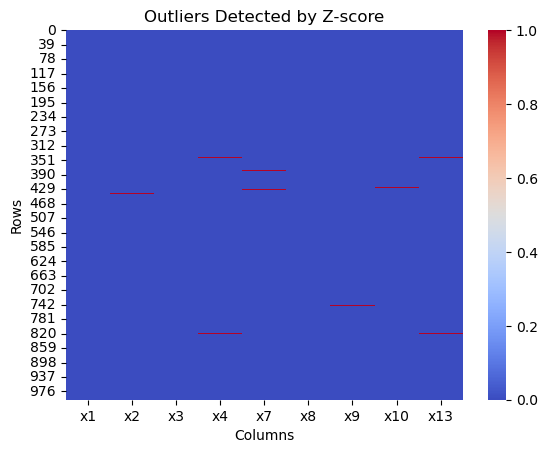

In [88]:
sns.heatmap(outliers, cmap='coolwarm')
plt.title('Outliers Detected by Z-score')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

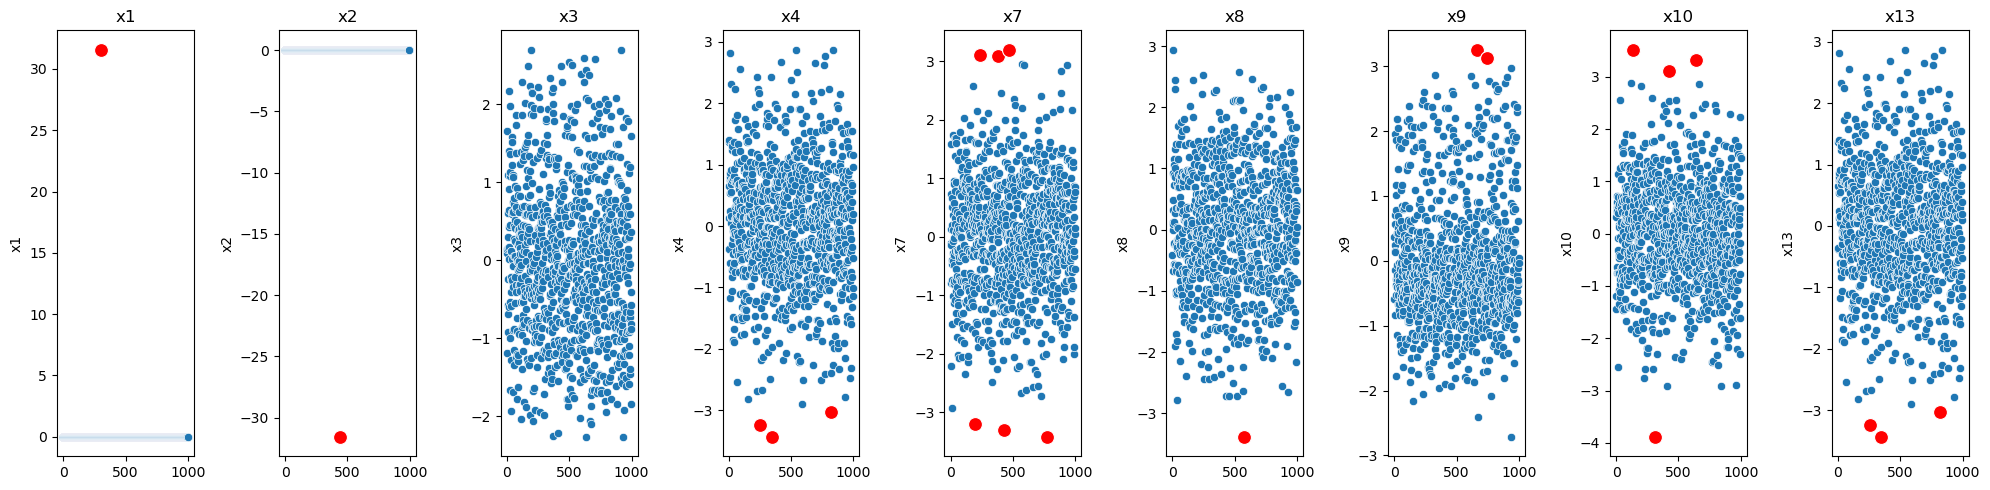

In [92]:
# Get columns with float64 dtype
float_cols = df_copy.select_dtypes(include='float64').columns

# Calculate z-scores for each column
df_zscores = df_copy[float_cols].apply(zscore)

# Set threshold for identifying outliers
threshold = 3

# Create subplots for each column with potential outliers
fig, axs = plt.subplots(nrows=1, ncols=len(float_cols), figsize=(20, 5))

for i, col in enumerate(float_cols):
    # Identify potential outliers
    outliers = df_zscores[(df_zscores[col] > threshold) | (df_zscores[col] < -threshold)][col]
    
    # Plot z-scores for each data point
    sns.scatterplot(data=df_zscores, x=df_zscores.index, y=col, ax=axs[i])
    
    # Highlight potential outliers
    sns.scatterplot(data=df_zscores.loc[outliers.index], x=outliers.index, y=col, color='red', s=100, ax=axs[i])
    
    # Set plot title
    axs[i].set_title(col)
    
# Adjust plot layout
plt.tight_layout()

# Show plot
plt.show()

Both column 'x1' and 'x2' have some clear outliers. The rest will be left alone for now. The values in 'x1' and 'x2' will be replaced by the median value of respective column.

In [97]:
# Find the median of the x1 column
x1_median = df_copy['x1'].median()

# Replace the extreme x1 value with the median
df_copy.loc[df_copy['x1'].abs() > 500, 'x1'] = x1_median

# Find the median of the x2 column
x2_median = df_copy['x2'].median()

# Replace the extreme x2 value with the median
df_copy.loc[df_copy['x2'].abs() > 500, 'x2'] = x2_median

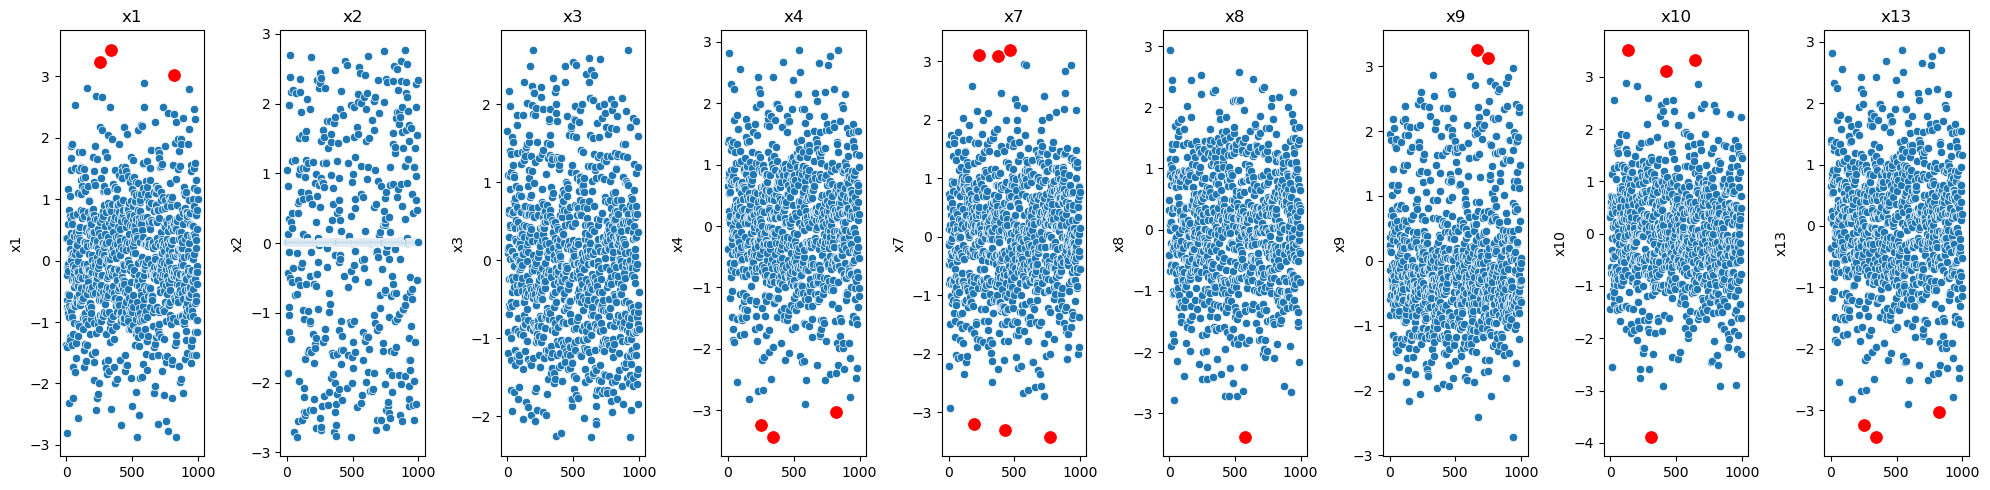

In [98]:
# Get columns with float64 dtype
float_cols = df_copy.select_dtypes(include='float64').columns

# Calculate z-scores for each column
df_zscores = df_copy[float_cols].apply(zscore)

# Set threshold for identifying outliers
threshold = 3

# Create subplots for each column with potential outliers
fig, axs = plt.subplots(nrows=1, ncols=len(float_cols), figsize=(20, 5))

for i, col in enumerate(float_cols):
    # Identify potential outliers
    outliers = df_zscores[(df_zscores[col] > threshold) | (df_zscores[col] < -threshold)][col]
    
    # Plot z-scores for each data point
    sns.scatterplot(data=df_zscores, x=df_zscores.index, y=col, ax=axs[i])
    
    # Highlight potential outliers
    sns.scatterplot(data=df_zscores.loc[outliers.index], x=outliers.index, y=col, color='red', s=100, ax=axs[i])
    
    # Set plot title
    axs[i].set_title(col)
    
# Adjust plot layout
plt.tight_layout()

# Show plot
plt.show()

In [99]:
df_copy.to_csv('clean_5.csv', index=False)

In [100]:
df_corr = df_copy.copy()

In [101]:
df_float = df_corr.select_dtypes(include='float64')

In [102]:
corr_matrix = df_float.corr()

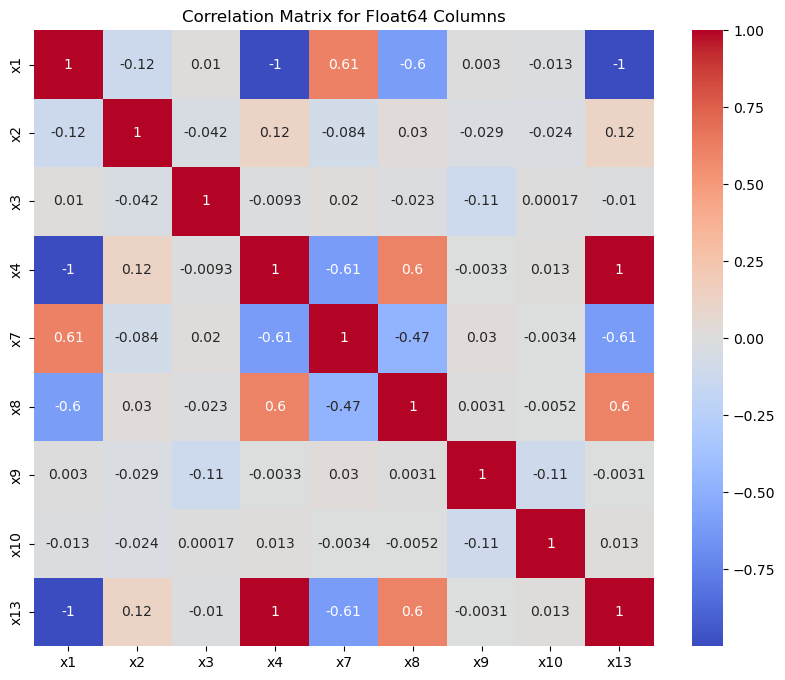

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Float64 Columns')
plt.show()

# Preprocess

In [104]:
df_clean = pd.read_csv('clean_5.csv')

In [105]:
df_clean.dtypes

y       object
x1     float64
x2     float64
x3     float64
x4     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11       bool
x12       bool
x13    float64
dtype: object

In [107]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

random_state = 5

X = df_clean.drop('y', axis=1)
y = df_clean.y

X_train, y_train = shuffle(X,y, random_state=random_state)

In [108]:
num_features = X.select_dtypes(include='float64').columns
cat_features = X.select_dtypes(include='bool').columns

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


cat_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

num_transformer = Pipeline(steps=[
    ('pca', PCA(n_components=9)),
])

In [135]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [136]:
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

classifiers = {
    "K-neighbours": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "Extremely random forest": ExtraTreesClassifier(random_state=random_state),
    "Adaboost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(random_state=random_state),
    "MLP": MLPClassifier(max_iter=2000, hidden_layer_sizes=(20,20)),
    "SVM (rbf)": SVC(),
    "SVM (linear)": SVC(kernel="linear"),
    "SVM (polynomial)": SVC(kernel="poly"),
    "Ridge Classifier": RidgeClassifierCV()
}

In [137]:
clf_best = None
clf_name_best = ""
score_best = 0

clf_best = None
clf_name_best = ""
score_best = 0

cv = StratifiedKFold(shuffle=True, random_state=random_state, n_splits=10)

for clf_name, clf in classifiers.items():
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    cv_score = np.average(cross_val_score(pipeline, X_train, y_train, cv=cv))

    print(f"{clf_name} scored {cv_score} during cross validation")
    
    if cv_score > score_best:
        score_best = cv_score
        clf_best = pipeline
        clf_name_best = clf_name
        
print(f"\nBest classifier: {clf_name_best}")

D:\Program\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Program\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

K-neighbours scored 0.537050505050505 during cross validation
Decision tree scored 0.7024848484848485 during cross validation
Random forest scored 0.7715252525252525 during cross validation
Gradient Boosting scored 0.7735050505050505 during cross validation
Extremely random forest scored 0.7735454545454545 during cross validation
Adaboost scored 0.6993535353535353 during cross validation
Bagging scored 0.7464646464646465 during cross validation
MLP scored 0.6102222222222223 during cross validation
SVM (rbf) scored 0.5591111111111111 during cross validation
SVM (linear) scored 0.6613131313131314 during cross validation
SVM (polynomial) scored 0.5591111111111111 during cross validation
Ridge Classifier scored 0.6552626262626263 during cross validation

Best classifier: Extremely random forest


In [139]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest', RandomForestClassifier(random_state=random_state))])
params = { 
 'forest__bootstrap': [True, False],
 'forest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'forest__max_features': ['auto', 'sqrt'],
 'forest__min_samples_leaf': [1, 2, 4],
 'forest__min_samples_split': [2, 5, 10],
 'forest__n_estimators': [200, 600, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
}
forest_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=120, verbose=1, n_jobs=-1, cv=cv)
forest_search.fit(X_train, y_train)
forest_search.best_score_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


0.7815959595959596

In [140]:
forest_search.best_params_

{'forest__n_estimators': 1000,
 'forest__min_samples_split': 2,
 'forest__min_samples_leaf': 2,
 'forest__max_features': 'auto',
 'forest__max_depth': 100,
 'forest__bootstrap': True}

In [141]:
estimator = forest_search.best_estimator_

In [142]:
estimator.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pca',
                                                                   PCA(n_components=9))]),
                                                  Index(['x1', 'x2', 'x3', 'x4', 'x7', 'x8', 'x9', 'x10', 'x13'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['x11', 'x12'], dtype='object'))])),
                ('forest',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=2,
                                        n_estimators=1000, random_state=5))])

In [143]:
df_eval = pd.read_csv('EvaluateOnMe-6.csv')
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
 4   x5      10000 non-null  float64
 5   x6      7716 non-null   object 
 6   x7      10000 non-null  float64
 7   x8      10000 non-null  float64
 8   x9      10000 non-null  float64
 9   x10     10000 non-null  float64
 10  x11     10000 non-null  bool   
 11  x12     10000 non-null  bool   
 12  x13     10000 non-null  float64
dtypes: bool(2), float64(10), object(1)
memory usage: 879.0+ KB


In [144]:
predictions = estimator.predict(df_eval)

In [149]:
np.unique(predictions, return_counts=True)

(array(['Dragspel', 'Nyckelharpa', 'Serpent'], dtype=object),
 array([6812, 1659, 1529], dtype=int64))

In [151]:
from os import linesep

OUT_FILE = 'eval_labels.txt'

with open(OUT_FILE, 'w') as f:
    for pred in predictions:
        f.write(str(pred) + '\n')